In [109]:
from DatasetGenerator import *
from helpers import *
from markov_algos import *
from plots import *

from time import time

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing the implementation

In [105]:
def testing_metropolis(data, betas, lambda_, n_iter):
    n, coords, pop = data.N, data.x, data.v
    starting_state = np.random.randint(0, 2, data.N)
    
    S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data)
    most_crowded_cities = np.argwhere(pop == np.max(pop))
    
    print('S~:', S_approx)
    print('size of S~:', len(S_approx))
    print('f(S~):', f(S_approx, lambda_, data))
    print('most crowded city:', most_crowded_cities)
    print('f({most crowed city}):', f(most_crowded_cities[0], lambda_, data))
    return f(S_approx, lambda_, data)

/Users/anita/Documents/EPFL/markov_chains/aquarium/plots.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obj.savefig('plots/avg_obj_{}to{}.pdf'.format(lambdas[0], lambdas[-1]))
/Users/anita/Documents/EPFL/markov_chains/aquarium/plots.py:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_size.savefig('plots/avg_size_{}to{}.pdf'.format(lambdas[0], lambdas[-1]))


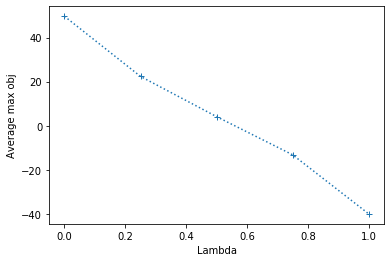

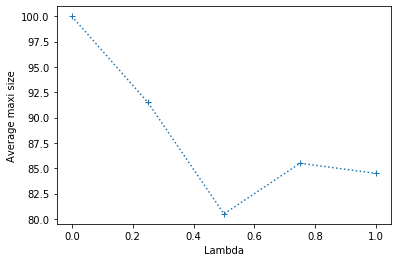

In [107]:
G = G1 
lambdas = np.linspace(0, 1, 5)
betas = np.logspace(0, 3, 7)
n_iter = 1000
nb_instances = 2
plot_avg_lambda(G, lambdas, betas, n_iter, nb_instances, verbose=False)

In [ ]:
def evol_n_iter():
    G = G1 
    lambda_ = 0.5
    betas = np.logspace(0, 3, 7)
    n_iter_range = range(200, 20000, 2000)
#     n_iter_range = [200, 300]
    obj_range = []
    size_range = []
    for i, n_iter in enumerate(n_iter_range):
        avg_obj, avg_size = avg(G, betas, lambda_, n_iter, 2, verbose=False)
        obj_range.append(avg_obj)
        size_range.append(avg_size)
        
        print("[n_iter {}/{}]".format(i + 1, len(n_iter_range)))

    fig, ax = plt.subplots()
    ax.plot(n_iter_range, obj_range, color='blue', marker='o', ls=':')
    ax2 = ax.twinx()
    ax2.plot(n_iter_range, size_range, color='red', marker='o', ls=':')
    
    ax.set_title("Evolution of the approximate maximum with respect to"
                 + "\n the number of iteration per Metropolis-Hastings algorithm.", fontsize=16)
    ax.set_xlabel("Number of steps per Metropolis-Hastings algorithm", fontsize=14)
    ax.set_ylabel("Maximum objectif function", color='blue', fontsize=14)
    ax2.set_ylabel("Optimal number of cities", color='red', fontsize=14)
    fig.show()

In [65]:
evol_n_iter()

[n_iter 1/10]
[n_iter 2/10]
[n_iter 3/10]
[n_iter 4/10]


KeyboardInterrupt: 

[step 1/7] Time spent on beta = 1.000 : 9.043 sec
[step 2/7] Time spent on beta = 3.162 : 9.380 sec
[step 3/7] Time spent on beta = 10.000 : 9.492 sec
[step 4/7] Time spent on beta = 31.623 : 9.235 sec
[step 5/7] Time spent on beta = 100.000 : 10.804 sec
[step 6/7] Time spent on beta = 316.228 : 10.495 sec
[step 7/7] Time spent on beta = 1000.000 : 10.161 sec


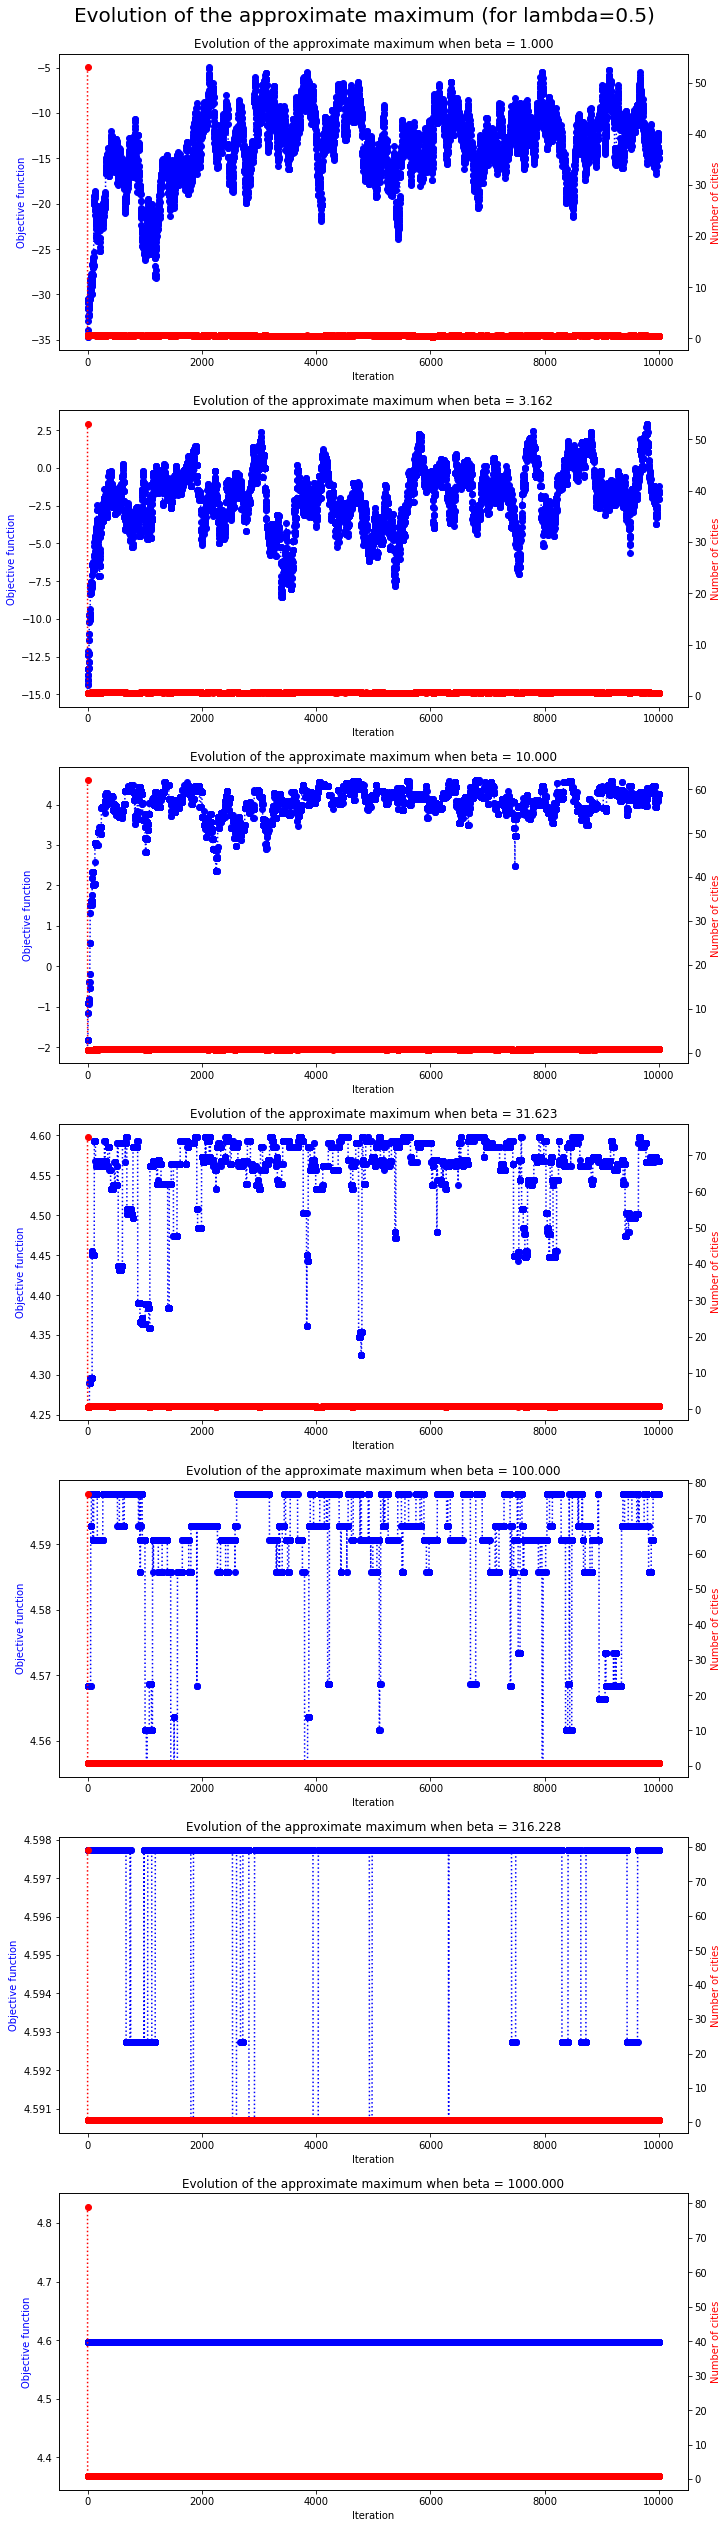

In [110]:
data = G1()
lambda_ = 0.5
n_iter = 10000
starting_state = np.random.randint(0, 2, data.N)

betas = np.logspace(0, 3, 7)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

In [22]:
data = G1()  
lambda_ = 100
n_iter = 200
betas = np.logspace(0, 3, 7)
for _ in range(10):
    testing_metropolis(data, betas, lambda_, n_iter)
    print()

    
# for n iter = 200, almost everytime we got negative values

S~: [ 0  1  2  3  4  5  8 11 12 13 15 16 17 18 19 20 21 22 25 26 27 28 29 30
 31 34 35 36 39 40 41 43 44 46 48 49 50 51 53 54 55 57 59 60 61 63 64 65
 66 67 68 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 95 96 97 98 99]
size of S~: 72
f(S~): -6129.797010110243
most crowded city: [[79]]
f({most crowed city}): 0.9984149796921794

S~: [ 0  1  2  3  4  5  7  8  9 10 12 13 16 17 18 19 21 22 25 26 27 28 29 30
 31 35 36 39 40 41 42 43 44 46 48 49 50 51 53 54 55 57 59 60 61 63 64 65
 66 67 68 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 95 96 97 98 99]
size of S~: 72
f(S~): -6331.298167406605
most crowded city: [[79]]
f({most crowed city}): 0.9984149796921794

S~: [ 0  1  2  3  4  5  8  9 12 13 14 16 17 18 19 20 21 22 24 25 26 27 28 29
 30 31 35 36 37 38 39 40 41 43 44 46 49 51 53 54 55 57 58 59 60 61 64 65
 66 67 68 70 71 73 74 75 76 78 80 81 82 83 84 87 88 89 90 91 92 95 96 97
 98 99]
size of S~: 74
f(S~): -6435.871477608446
most crowded city: [[79]]
f({most crowed city}): 0.998414979

In [ ]:
lambda_ = 0
n_iter = 1000
testing_metropolis(data, np.logspace(0, 3, 7), lambda_, n_iter)

In [ ]:
lambda_ = 100
n_iter = 20000
testing_metropolis(data, np.logspace(0, 3, 7), lambda_, n_iter)

## Question 2.a 

In [8]:
data = G1()  
lambda_ = 100
n_iter = 2000
betas = np.logspace(0, 3, 7)

KeyboardInterrupt: 

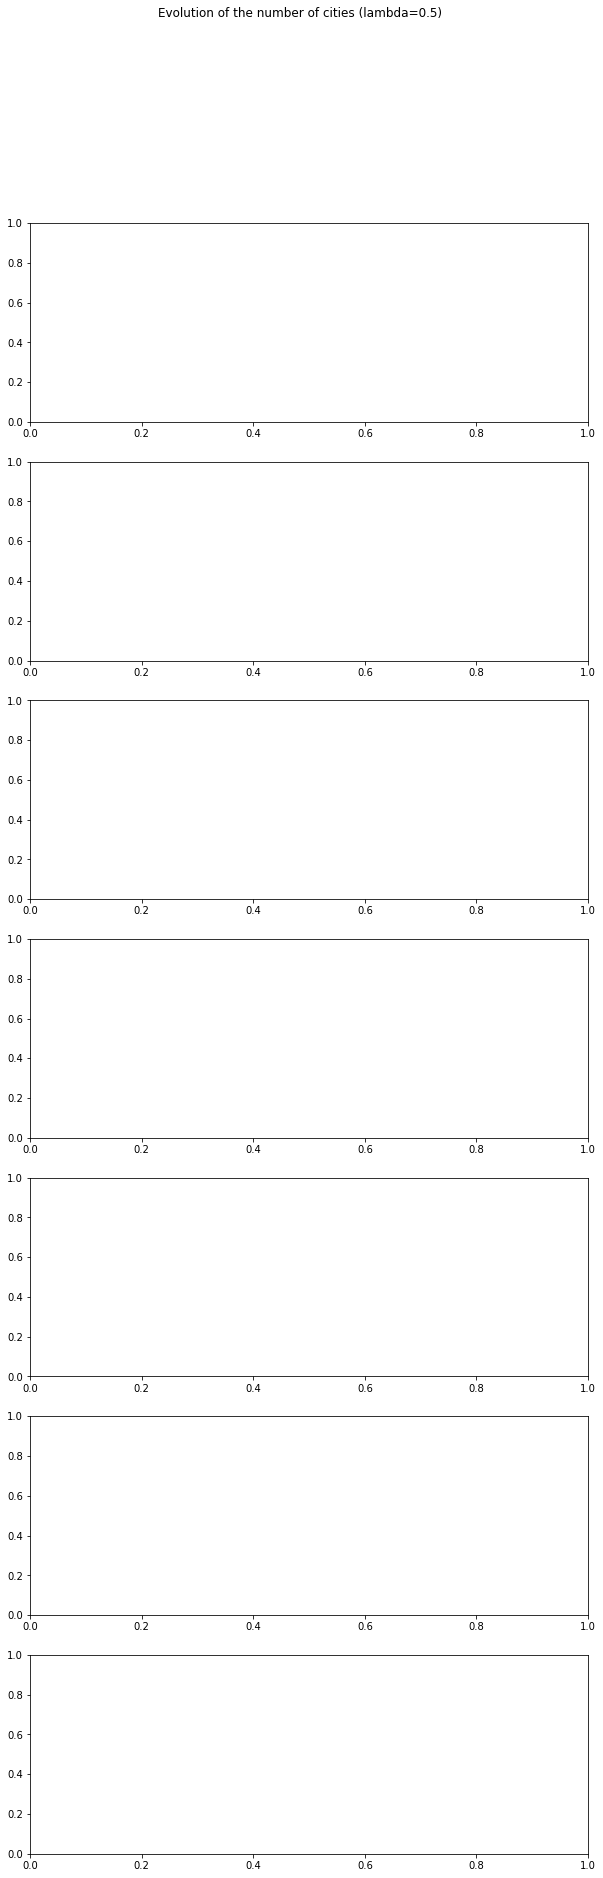

In [9]:
simulated_annealing(betas, n_iter, lambda_, data, verbose=True, plot_size=True, plot_obj=True)

In [ ]:
simulated_annealing(betas, n_iter, lambda_, data, verbose=True, plot_obj=True)

## Question 2.b

1) Plotting E(|S*(lambda)|) for lambda in range [0.1, 10]

In [ ]:
lambdas = np.logspace(-1, 0, 5)

In [ ]:
plot_avg_size(G1, lambdas, betas, 2000, 5, verbose=True)

In [ ]:
plot_avg_obj(G1, lambdas, betas, 2000, 5, verbose=True)

## Same questions for model G2

In [2]:
data = G2()
n, coords, pop = data.N, data.x, data.v
lambda_ = 100
betas = np.logspace(0, 3, 7)

In [ ]:
simulated_annealing(betas, n_iter, lambda_, data, verbose=True, plot_size=True)

[step 1/7] Time spent on beta = 1.000 : 0.182 sec
[step 2/7] Time spent on beta = 3.162 : 0.129 sec
[step 3/7] Time spent on beta = 10.000 : 0.185 sec
[step 4/7] Time spent on beta = 31.623 : 0.179 sec
[step 5/7] Time spent on beta = 100.000 : 0.203 sec
[step 6/7] Time spent on beta = 316.228 : 0.176 sec
[step 7/7] Time spent on beta = 1000.000 : 0.217 sec
[lambda=0.0 : 1/2]
[step 1/7] Time spent on beta = 1.000 : 0.161 sec
[step 2/7] Time spent on beta = 3.162 : 0.206 sec
[step 3/7] Time spent on beta = 10.000 : 0.218 sec
[step 4/7] Time spent on beta = 31.623 : 0.266 sec
[step 5/7] Time spent on beta = 100.000 : 0.202 sec
[step 6/7] Time spent on beta = 316.228 : 0.262 sec
[step 7/7] Time spent on beta = 1000.000 : 0.313 sec
[lambda=0.0 : 2/2]
[step 1/7] Time spent on beta = 1.000 : 0.175 sec
[step 2/7] Time spent on beta = 3.162 : 0.201 sec
[step 3/7] Time spent on beta = 10.000 : 0.153 sec
[step 4/7] Time spent on beta = 31.623 : 0.204 sec
[step 5/7] Time spent on beta = 100.000 : 

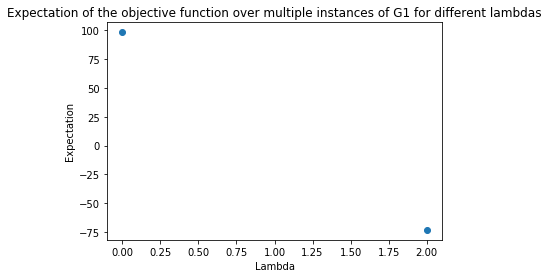

In [3]:
lambdas = np.linspace(0, 2, 2)

plot_avg_obj(G2, lambdas, betas, 200, 2, verbose=True)

In [ ]:
lambdas = np.linspace(0, 2, 5)
plot_avg_obj(G2, lambdas, betas, 2000, 5, verbose=True)